In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [27]:
#this fuzzy system is defined to avoid a sudden obstacle appear in front cars' current track like pedestrians
                            #and other vehicles, stationary objects like road signs , barriers and etc. 

#input variables  
#this inputs are obtain by the advance sensors of the self driving car and they are taking input within 
                                                             # a optimum range which they can be accessed

#current speed of the self-driving car km per hour 
#maximum speed of the car is 100 km per hour 
speed = ctrl.Antecedent(np.arange(0,101,1),'speed')

#speed limit of the current location
speed_limit = ctrl.Antecedent(np.arange(0,101,1),'speed_limit')

# distance to the sudden obstacle in meter
#the car sensors can recognize a obstacle in front is within a maximum distance of 100m (assuming road is a straight line)
distance = ctrl.Antecedent(np.arange(0,101,1),'distance')

# distance to vehicle in right side
# The car sensors recognize a another vehicle in right side is within a maximum distance of 10m  from cars front line
distance_left = ctrl.Antecedent(np.arange(0,11,1),'distance_left')

# distance to vehicle in left side
# The car sensors recognize a another vehicle in left side is within a maximum distance of 10m  from cars front line 
distance_right = ctrl.Antecedent(np.arange(0,11,1),'distance_right')


#input membership functions
speed['slow'] = fuzz.trimf(speed.universe, [0,0,50])
speed['moderate'] = fuzz.trimf(speed.universe, [0,50,100])
speed['fast'] = fuzz.trimf(speed.universe, [50,100,100])

speed_limit['slow'] = fuzz.trimf(speed_limit.universe, [0,0,50])
speed_limit['moderate'] = fuzz.trimf(speed_limit.universe, [0,50,100])
speed_limit['fast'] = fuzz.trimf(speed_limit.universe, [0,100,100])

distance['very_close'] = fuzz.trimf(distance.universe, [0,0,10])
distance['close'] = fuzz.trimf(distance.universe, [0,25,100])
distance['moderate'] = fuzz.trimf(distance.universe, [0,50,100])
distance['far'] = fuzz.trimf(distance.universe, [50,100,100])

distance_left['close'] = fuzz.trimf(distance_left.universe, [0,0,6]) #risky distnce, steering caused to an accident 
distance_left['moderate'] = fuzz.trimf(distance_left.universe, [0,5,10])
distance_left['far'] = fuzz.trimf(distance_left.universe, [4, 10 ,10]) #non risky, enough distance to steer

distance_right['close'] = fuzz.trimf(distance_right.universe, [0, 0, 6 ])
distance_right['moderate'] = fuzz.trimf(distance_right.universe, [0, 5,10 ])
distance_right['far'] = fuzz.trimf(distance_right.universe, [4, 10, 10])

#Defining output variables
#Brake
brake = ctrl.Consequent(np.arange(0,101,1), 'brake')
# warning to the obstacle by horn (pedestrian or other vehicle or animal or etc)
horn = ctrl.Consequent(np.arange(0,2,1), 'horn')
# Car's action (50: Maintain , 0: steer Left side and  100: steer Right side)
# the car is sheduled to the correct angle to steer acoording this output (Eg- if output=50 angle=0 degrees , if output=0 angle =-45 degrees) 
steering_action = ctrl.Consequent (np.arange(0,101,1), 'steering_action') 
#speed adjustment
adjust_speed = ctrl.Consequent (np.arange(-20,21,1), 'adjust_speed') 
 
#Define membership functions for output variables
brake['low'] = fuzz.trimf(brake.universe,[0,0,50])
brake['medium'] = fuzz.trimf(brake.universe,[10,50,90])
brake['high'] = fuzz.trimf(brake.universe,[50,100,100])

horn['yes'] = fuzz.trimf(horn.universe,[0,1,1])
horn['no'] = fuzz.trimf(horn.universe,[0,0,1])

steering_action ['steer_left'] = fuzz.trimf(steering_action.universe, [0, 0, 50]) 
steering_action ['maintain'] = fuzz.trimf(steering_action.universe, [0,50,100])
steering_action ['steer_right'] = fuzz.trimf(steering_action.universe, [50,100,100])


adjust_speed['decelerate'] = fuzz.trimf(adjust_speed.universe, [-20, -20, 0])
adjust_speed['maintain'] = fuzz.trimf(adjust_speed.universe, [-20, 0, 20])
adjust_speed['accelerate'] = fuzz.trimf(adjust_speed.universe, [0, 20, 20])

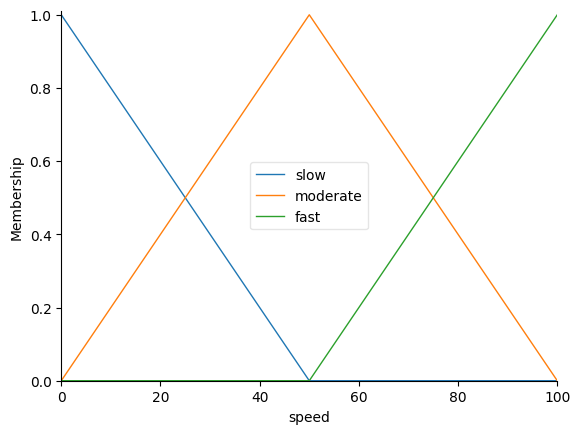

In [28]:
speed.view()

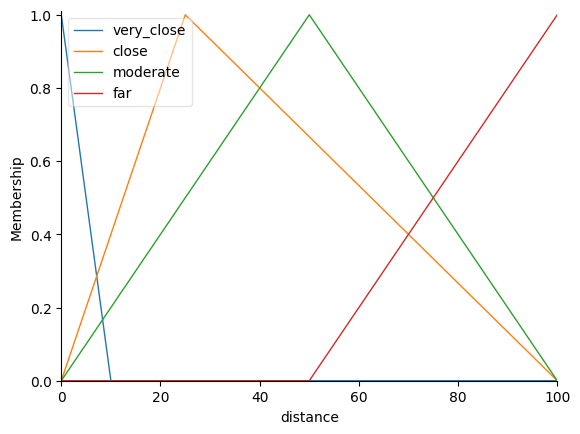

In [29]:
distance.view()

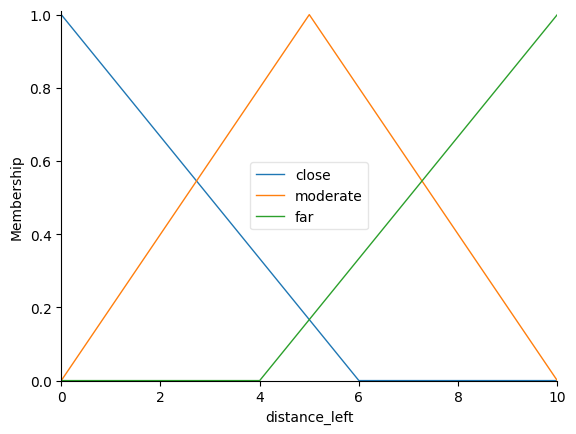

In [30]:
distance_left.view()

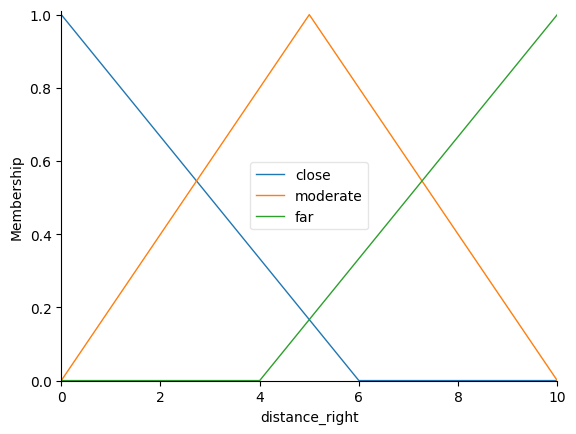

In [31]:
distance_right.view()

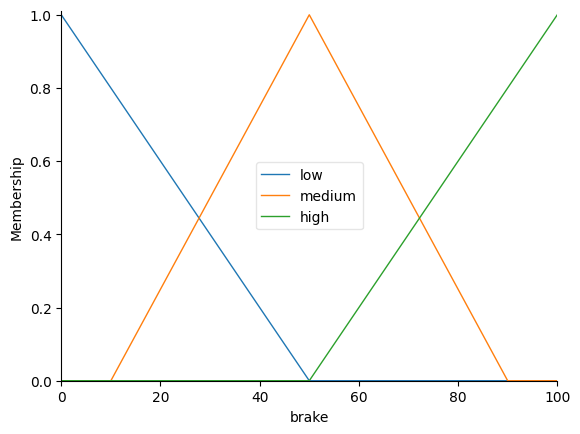

In [32]:
brake.view()

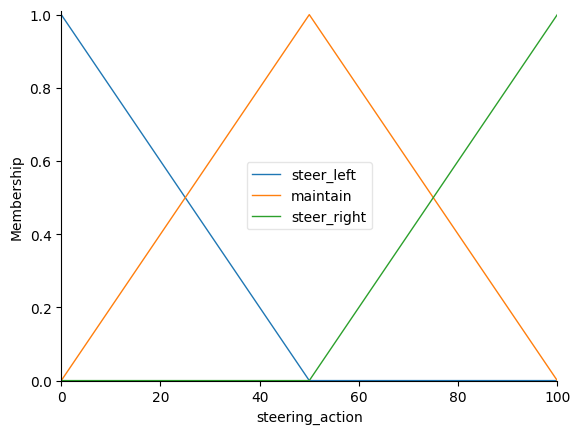

In [33]:
steering_action.view()

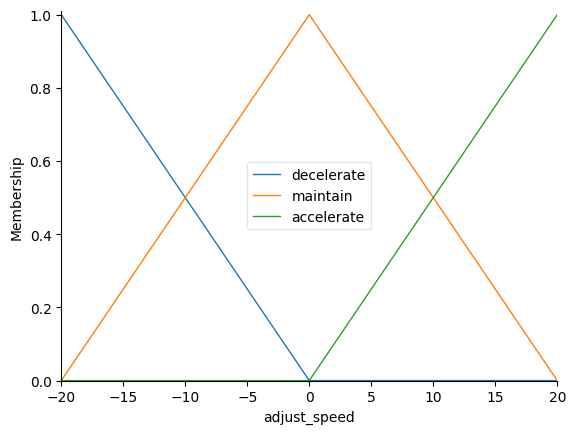

In [34]:
adjust_speed.view()

In [35]:
#Defining the fuzzy rules
rule1 = ctrl.Rule(distance['very_close']   , brake['high'])
rule2 = ctrl.Rule(distance['close'] & speed['fast']   , brake['high'])
rule3 = ctrl.Rule(distance['close'] & speed['moderate']   , brake['medium'])
rule4 = ctrl.Rule(distance['close'] & speed['slow']   , brake['low'])
rule22 = ctrl.Rule(distance['far']   , brake['low'])
rule25 = ctrl.Rule(distance['close']   , steering_action ['maintain'])
rule5 = ctrl.Rule(distance['moderate'] & speed['fast'] & distance_right['far'] & distance_left['far'], steering_action ['steer_left'] )
rule6 = ctrl.Rule(distance['moderate'] & speed['fast'] & distance_right['far'] & distance_left['close'], steering_action ['steer_right'] )
rule7 = ctrl.Rule(distance['moderate'] & speed['fast'] & distance_right['close'] & distance_left['far'], steering_action ['steer_left'] )
rule8 = ctrl.Rule(distance['moderate'] & speed['fast'] & distance_right['close'] & distance_left['close'], steering_action ['maintain'] )
rule9 = ctrl.Rule(distance['moderate'] & speed['moderate'] & distance_right['far'] & distance_left['far'], steering_action ['steer_left'] )
rule10= ctrl.Rule(distance['moderate'] & speed['moderate'] & distance_right['far'] & distance_left['close'], steering_action ['steer_right'] )
rule11 = ctrl.Rule(distance['moderate'] & speed['moderate'] & distance_right['close'] & distance_left['far'], steering_action ['steer_left'] )
rule12 = ctrl.Rule(distance['moderate'] & speed['moderate'] & distance_right['close'] & distance_left['close'], steering_action ['maintain'] )
rule13 = ctrl.Rule(distance['moderate'] & speed['slow'] & distance_right['far'] & distance_left['far'], steering_action ['steer_left'] )
rule14 = ctrl.Rule(distance['moderate'] & speed['slow'] & distance_right['far'] & distance_left['close'], steering_action ['steer_right'] )
rule15 = ctrl.Rule(distance['moderate'] & speed['slow'] & distance_right['close'] & distance_left['far'], steering_action ['steer_left'] )
rule16 = ctrl.Rule(distance['moderate'] & speed['slow'] & distance_right['close'] & distance_left['close'], steering_action ['maintain'] )
rule17 = ctrl.Rule(distance['far'] ,horn['yes'] )
rule23 = ctrl.Rule(speed['fast']  ,horn['yes'] )
rule24 = ctrl.Rule(distance['close'],horn['yes'] )
rule18 = ctrl.Rule(distance['far'] & distance_right['close'] & distance_left['close'], steering_action ['maintain'] )
rule19 = ctrl.Rule(distance['far'] & distance_right['far'] & distance_left['far'], steering_action ['maintain'] )
rule20 = ctrl.Rule(distance['far'] & distance_right['close'] & distance_left['far'], steering_action ['maintain'] )
rule21 = ctrl.Rule(distance['far'] & distance_right['far'] & distance_left['close'], steering_action ['maintain'] )
  
#creating control system and simulation
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23,rule24, rule25])  
simulation = ctrl.ControlSystemSimulation(system)

#Set input values obtained by self driving car sensors
simulation.input['speed'] = 100  # speed km/h
simulation.input['distance'] = 2 #meters
simulation.input['distance_left'] = 8 #in meters to left vehicle
simulation.input['distance_right'] = 7 #in meters to right vehicle

simulation.compute()

print("Brake:", simulation.output['brake'])
print("Horn:", simulation.output['horn']) #if output value<0.5; horn = no , if output value>0.5; horn = yes
print("Steering_action :", simulation.output['steering_action']) #  if output=50 steering_action is maintain (No steer) ; if output=0 ; steer_left

Brake: 82.77777777777777
Horn: 0.6666666666666666
Steering_action : 49.74438687392052


rule1 (<Figure size 640x480 with 1 Axes>, <Axes: >)
rule5 (<Figure size 640x480 with 1 Axes>, <Axes: >)


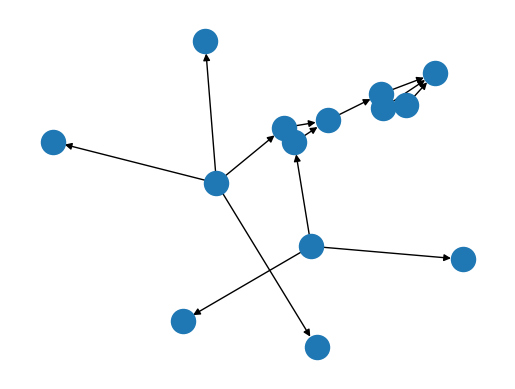

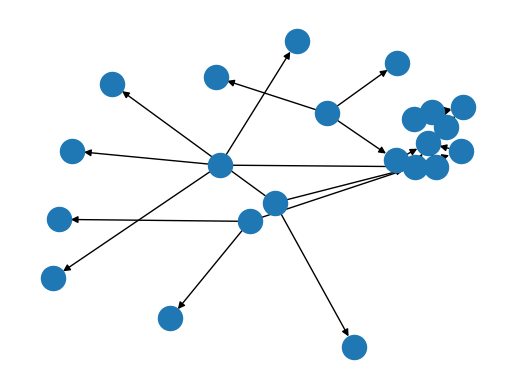

In [36]:
#view connections of a specific rule  
r2 = rule2.view()
print("rule1",r2)
r5 =rule5.view()
print("rule5",r5)

10.96296296296296


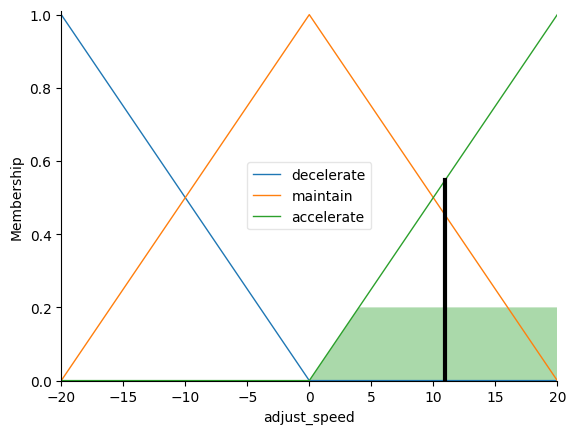

In [37]:
rule26 = ctrl.Rule(speed['fast'] & speed_limit['slow']  , adjust_speed['decelerate'] )
rule27 = ctrl.Rule(speed['slow'] & speed_limit['fast']  , adjust_speed['accelerate'] )
rule28 = ctrl.Rule(speed['moderate'] & speed_limit['moderate']  , adjust_speed['maintain'] )
rule29 = ctrl.Rule(speed['fast'] & speed_limit['fast']  , adjust_speed['maintain'] )
rule30 = ctrl.Rule(speed['slow'] & speed_limit['slow']  , adjust_speed['maintain'] )

fis_ctrl = ctrl.ControlSystem([rule26, rule27, rule28, rule29, rule30])
fis = ctrl.ControlSystemSimulation(fis_ctrl)

#Input values as per the scenario  
fis.input['speed'] = 40  #Example value 40 km/h
fis.input['speed_limit'] =100

#perform fuzzy inference
fis.compute()
#output result
print(fis.output['adjust_speed'])

#view
adjust_speed.view(sim=fis)